<a href="https://colab.research.google.com/github/WilkisterMbaka/Finscope-Financial-Analysis/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2022_05_Wilkister_Mbaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finscope Financial analysis**

##**1.0 Defining the Question**

**a) Specifying the Question**

How we can determine which individuals are most likely to have or use a bank account

**b) Defining the Metric for Success**

* To identify the characteristics and categories of individuals who are most likely to have or use a bank account
* Show the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda
* Providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


**c) Understanding the context** 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

**d) Recording the Experimental Design**

* Defining the question
* Data Loading
* Data Understanding
* Data Preparation
* Data Analysis (EDA)
  * Univariate analysis
  * Bivariate analysis
  * Multivariate analysis

* Implementing the solution
* Challenging the solution
* Follow up questions

**e) Data Relevance**

This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

* FinAccess Kenya 2018. [Link](https://fsdkenya.org/publication/finaccess2019/)
* Finscope Rwanda 2016. [Link](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)
* Finscope Tanzania 2017. [Link](http://www.fsdt.or.tz/finscope/)
* Finscope Uganda 2018. [Link](http://fsduganda.or.ug/finscope-2018-survey-report/)

##2.0 Reading the Data

In [1]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt

In [2]:
# Loading the Data from the source i.e. csv
#
df_definitions = pd.read_csv('http://bit.ly/VariableDefinitions')
df_definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
# Load the dataset
df = pd.read_csv('http://bit.ly/FinancialDataset')

##**3.0 Checking the Data**

In [4]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 23524 
Number of columns: 13


In [5]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
#Checking how many unique value are in a column
df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [9]:
# Check for unique values in each column
for col in df.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

country column unique values: 

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
**********


year column unique values: 

[2018 2029 2056 2016 2039 2017]
**********


uniqueid column unique values: 

['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
**********


Has a Bank account column unique values: 

['Yes' 'No' nan]
**********


Type of Location column unique values: 

['Rural' 'Urban' nan]
**********


Cell Phone Access column unique values: 

['Yes' 'No' nan]
**********


household_size column unique values: 

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
**********


Respondent Age column unique values: 

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71. 

1. *The year column has incorrect data - years greater than 2018*
2. *The level of education column incorrect data - 6*
3. *Household size column has 0 as its input which is incorrect*

##**4.0 Tidying the Dataset**

In [10]:
# Rename columns
df = df.rename(columns={'Has a Bank account':'has_a_bank_account', 'Type of Location':'type_of_location', 'Cell Phone Access':'cellphone_access',  
'Respondent Age':'respondent_age', 'The relathip with head':'relationship_with_head', 'Level of Educuation':'level_of_education', 
'Type of Job':'type_of_job'})
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [11]:
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
# Check for white spaces
print(df['country'].str.isspace().sum())
print(df['uniqueid'].str.isspace().sum())
print(df['has_a_bank_account'].str.isspace().sum())
print(df['type_of_location'].str.isspace().sum())
print(df['cellphone_access'].str.isspace().sum())
print(df['gender_of_respondent'].str.isspace().sum())
print(df['relationship_with_head'].str.isspace().sum())
print(df['marital_status'].str.isspace().sum())
print(df['level_of_education'].str.isspace().sum())
print(df['type_of_job'].str.isspace().sum())
print(df.columns.str.isspace().sum())

0
0
0
0
0
0
0
0
0
0
0


In [13]:
# Fill in-record errors with nan values
# Education column has a six which is different from the rest
df['level_of_education'] = df['level_of_education'].replace(['6'], np.nan) 

In [14]:
df['level_of_education'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', nan], dtype=object)

In [15]:
# Drop year values that are greater than 2018 which were not included in our dataset
df = df[df['year']<=2018]

In [16]:
# Drop rows with household size as 0
df.drop(df[df['household_size'] == 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job


In [18]:
# Check for missing values in the dataset
# The scheduled at column has missing values but it is relevant. only those that have future in one of their statuses have values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cellphone_access          11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        56
type_of_job               30
dtype: int64

In [19]:
#Drop missing values as they are minimal
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


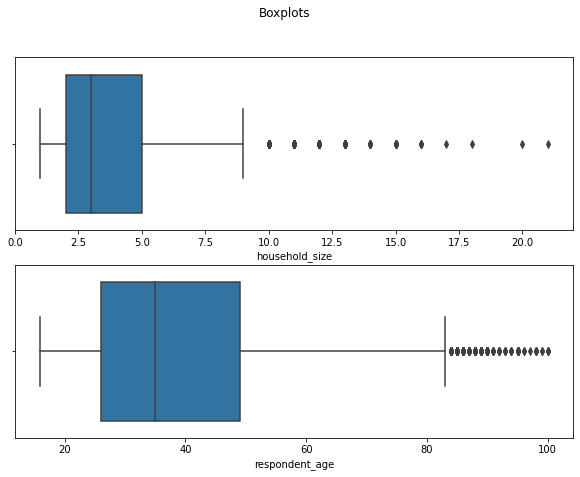

In [20]:
# Checking for Outliers
#
fig, (ax1, ax2)= plt.subplots(2,figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['respondent_age'], ax=ax2)
plt.show()

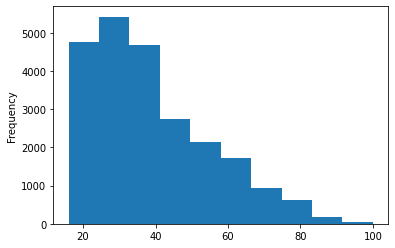

In [21]:
# Plot histogram for column age

df['respondent_age'].plot.hist()
# After plotting histogram chose not remove outliers as it did not seem to affect the data

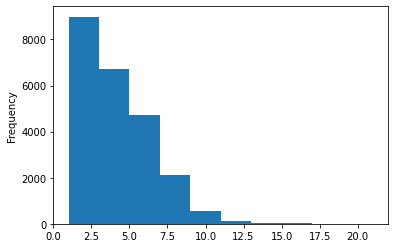

In [22]:
# Plot histogram for column household size

df['household_size'].plot.hist()
# After plotting histogram chose not remove outliers as it did not seem to affect the data

##**5.0 Exploratory Analysis**

###**5.1 Univariate Analysis**

In [23]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

**Numerical Attributes**

In [24]:
#Central Tendency (Shows mean, median, mode etc)
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# concatenate
m = pd.concat( [ct1,ct2] ).T.reset_index()
m.columns = ( ['columns', 'mean', 'median'])
m

,columns,mean,median
0,year,2016.977918,2017.0
1,household_size,3.694119,3.0
2,respondent_age,38.767023,35.0


In [25]:
#Central tendency - mode
num_attributes.mode()

,year,household_size,respondent_age
0,2016,2.0,30.0


In [26]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.var ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,year,0.721942,2.0,0.849672,0.041988,-1.613689
1,household_size,5.188990,20.0,2.277936,0.978032,1.159876
2,respondent_age,271.411675,84.0,16.474577,0.838819,0.095159


**household_size**
* It is positively skewed
* The kurtosis is a leptokurtic distribution.

**respondent_age**
* It is positively skewed
* The kurtosis is a mesokurtic distributions.

Text(0.5, 1.0, 'Respondent age Histogram')

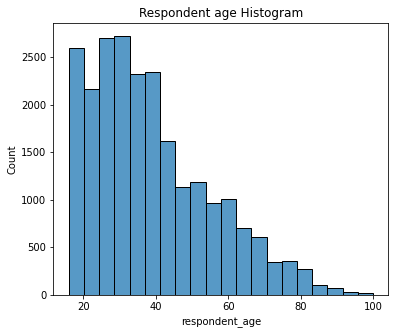

In [27]:
# Age distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['respondent_age'], bins=20)

plt.title('Respondent age Histogram')

*Age is positively skewed and majority of the respondents were on the younger side*

Text(0.5, 1.0, 'Household size Histogram')

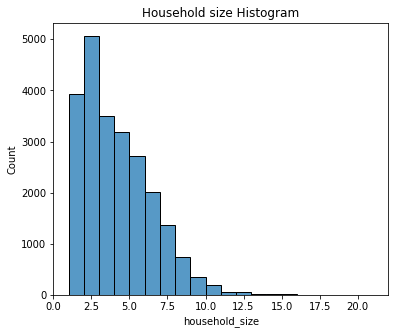

In [28]:
# Household size distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['household_size'], bins=20)

plt.title('Household size Histogram')

*Household size is positively skewed and the household size was on the smaller size*

Text(0.5, 1.0, 'Year Histogram')

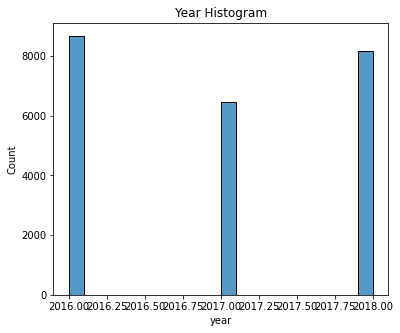

In [29]:
# Household size distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['year'], bins=20)

plt.title('Year Histogram')

**Categorical attributes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


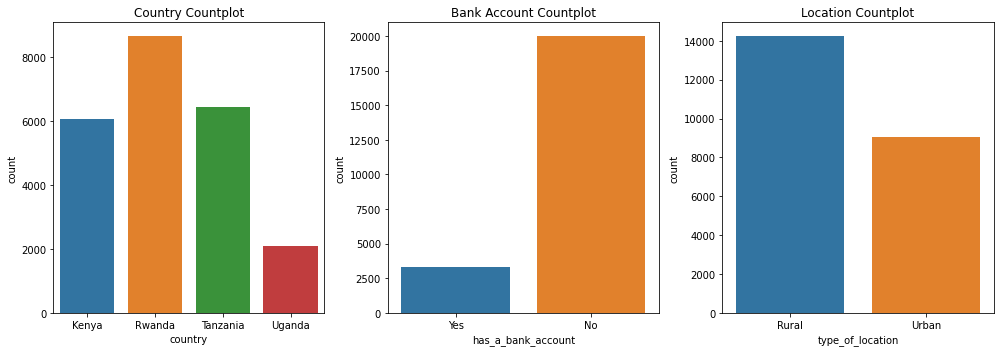

In [30]:
# Countplots
plt.rcParams["figure.figsize"] = [14, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)

sns.countplot(df.country, x='country', ax=axes[0])
sns.countplot(df.has_a_bank_account, x='has_a_bank_account', ax=axes[1])
sns.countplot(df.type_of_location, x='type_of_location', ax=axes[2])

axes[0].set_title('Country Countplot')
axes[1].set_title('Bank Account Countplot')
axes[2].set_title('Location Countplot')

plt.show()

1. *Rwanda had the highest number of respondents*
2. *Majority of the respondents did not have a bank account*
3. *Majority of the respondents were from rural areas*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


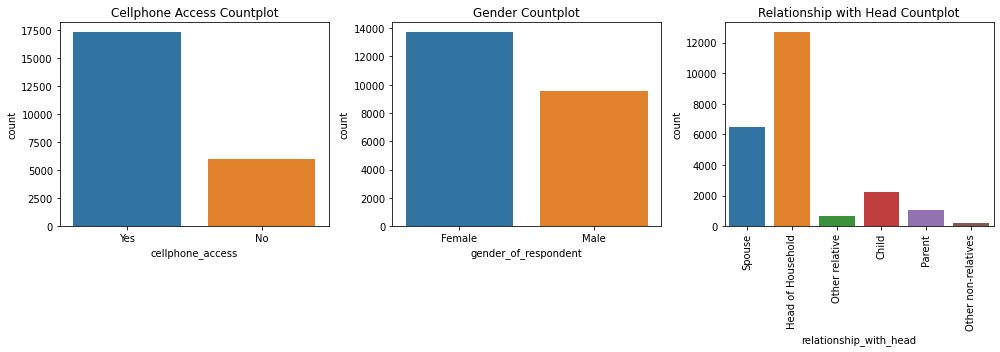

In [31]:
#Countplots
plt.rcParams["figure.figsize"] = [14.00, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)

sns.countplot(df.cellphone_access, x='cellphone_access', ax=axes[0])
sns.countplot(df.gender_of_respondent, x='gender_of_respondent', ax=axes[1])
sns.countplot(df.relationship_with_head, x='relationship_with_head', ax=axes[2])
plt.xticks(rotation=90)

axes[0].set_title('Cellphone Access Countplot')
axes[1].set_title('Gender Countplot')
axes[2].set_title('Relationship with Head Countplot')

plt.show()

1. *Majority of the respondents had access to mobile phones*
2. *Majority of the respondents were female*
3. *A higher percentage of respondents were head of households*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Job Type Countplot')

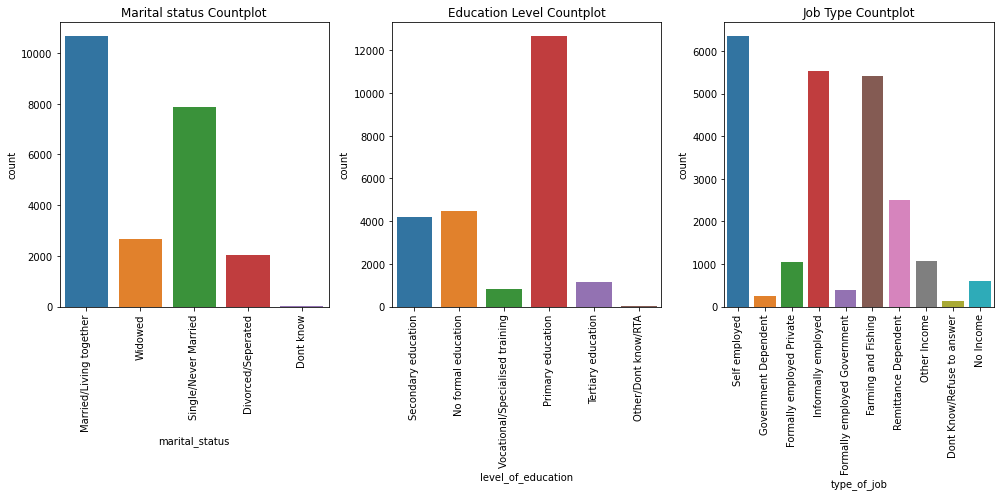

In [32]:
#Countplots
plt.rcParams["figure.figsize"] = [14.00, 7]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)

ax = sns.countplot(df.marital_status, x='marital_status', ax=axes[0])
ax1 = sns.countplot(df.level_of_education, x='level_of_education', ax=axes[1])
ax2 = sns.countplot(df.type_of_job, x='type_of_job', ax=axes[2])

ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

axes[0].set_title('Marital status Countplot')
axes[1].set_title('Education Level Countplot')
axes[2].set_title('Job Type Countplot')


1. *A higher percentage of respondents were married*
2. *A higher percentage of respondents had upto primary school education*
3. *A higher percentage of respondents were self-employed*

In [33]:
#Frequency distribution table
df['type_of_job'].value_counts().sort_values(ascending=False)

Self employed                   6356
Informally employed             5532
Farming and Fishing             5422
Remittance Dependent            2491
Other Income                    1076
Formally employed Private       1046
No Income                        597
Formally employed Government     386
Government Dependent             246
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

###**5.2 Bivariate Analysis**

In [34]:
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


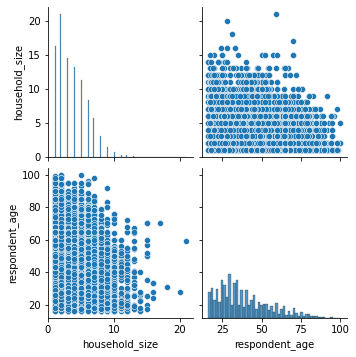

In [35]:
# Determine correlation between Household size and Respondent age
sns.pairplot(df[['household_size', 'respondent_age']])
# plt.title('Pairplot of househol size and respondent age')

*The scatter plot shows there is no coorelation between age and household size*

In [36]:
#Check for correlation between houshold size and age
df["household_size"].corr(df['respondent_age'])

-0.11716672218620257

*Age and household size a low negative correlation*

Text(0.5, 1.0, 'Correlation between numerical features')

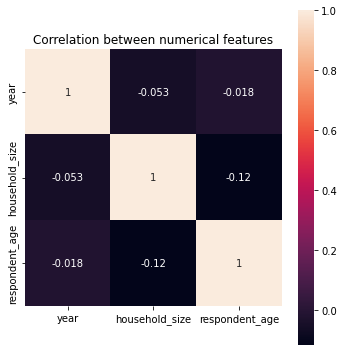

In [85]:
#Displaying correlation of household, age and years
correlation = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, square=True,annot=True)

plt.title('Correlation between numerical features')

*Age, Year and Household size have a low negative correlation*

Text(0.5, 1.0, 'Cellphone Access vs Bank Account')

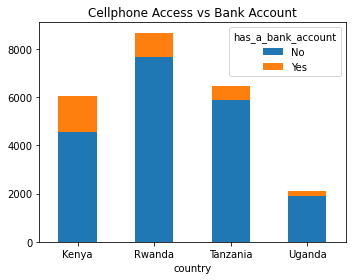

In [99]:
# How country relates to having a bank account
ax = df.groupby(['country', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=True, figsize=(5, 4))
ax.tick_params(axis='x', rotation=0)

plt.title('Country vs Bank Account')

*From the graph we can see that Kenya has a higher percentage of people with bank accounts*

Text(0.5, 1.0, 'Year vs Bank Account')

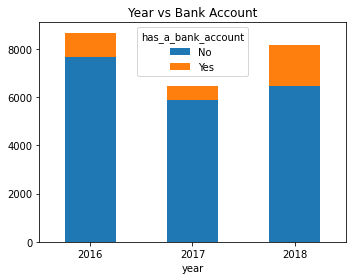

In [38]:
# Number of people who have a bank account per year vs those who don't
ax = df.groupby(['year', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=True, figsize=(5, 4))
ax.tick_params(axis='x', rotation=0)

plt.title('Year vs Bank Account')

*The year 2018 had a higher percentage of people with bank accounts*

Text(0.5, 1.0, 'Type of location vs Bank Account')

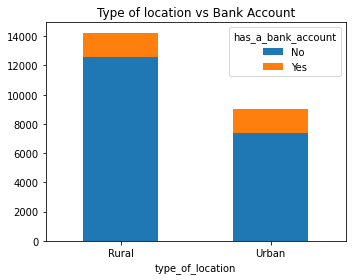

In [90]:
# How type of location relates to having a bank account
ax = df.groupby(['type_of_location', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=True, figsize=(5, 4))
ax.tick_params(axis='x', rotation=0)

plt.title('Type of location vs Bank Account')

In [96]:
#Confirm percentages of rural and urban because you cannot see from the bar chart
df.groupby('type_of_location')['has_a_bank_account'].value_counts(normalize=True) * 100

type_of_location  has_a_bank_account
Rural             No                    88.337783
                  Yes                   11.662217
Urban             No                    81.975008
                  Yes                   18.024992
Name: has_a_bank_account, dtype: float64

*Urban location had a higher percentage of people with bank accounts*

Text(0.5, 1.0, 'Cellphone Access vs Bank Account')

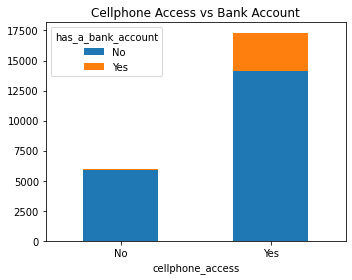

In [40]:
# How cellphone relates to having a bank account
ax = df.groupby(['cellphone_access', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=True, figsize=(5, 4))
ax.tick_params(axis='x', rotation=0)

plt.title('Cellphone Access vs Bank Account')

*Majority of people who had bank accounts also had cellphones*

Text(0.5, 1.0, 'Gender vs Bank Account')

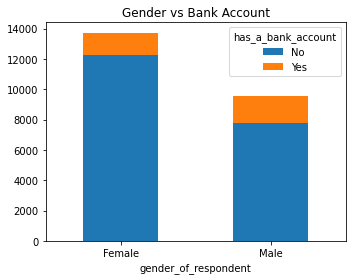

In [41]:
# How gender relates to having a bank account
ax = df.groupby(['gender_of_respondent', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=True, figsize=(5, 4))
ax.tick_params(axis='x', rotation=0)

plt.title('Gender vs Bank Account')

In [97]:
# Check percentages of gender
df.groupby('gender_of_respondent')['has_a_bank_account'].value_counts(normalize=True) * 100

gender_of_respondent  has_a_bank_account
Female                No                    89.236263
                      Yes                   10.763737
Male                  No                    81.025641
                      Yes                   18.974359
Name: has_a_bank_account, dtype: float64

*Male individuals had a higher percentage of having cellphones*

Text(0.5, 1.0, 'Relationship with Head of Household vs Bank Account')

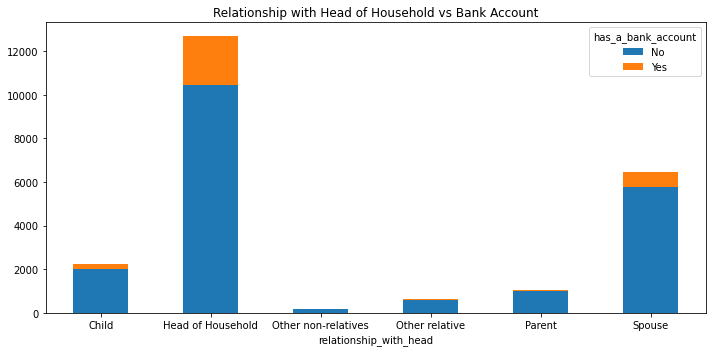

In [42]:
# How Relationship with Head of Household relates to having a bank account
ax = df.groupby(['relationship_with_head', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
ax.tick_params(axis='x', rotation=0)

plt.title('Relationship with Head of Household vs Bank Account')

*The head of the household had a higher percentage of having a bank account*

Text(0.5, 1.0, 'Marital Status vs Bank Account')

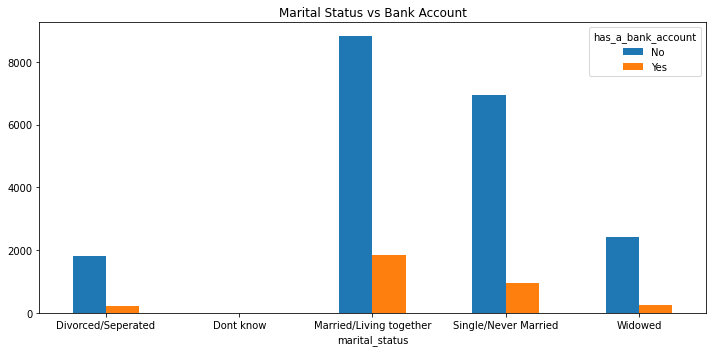

In [43]:
# How marital status relates to having a bank account
ax = df.groupby(['marital_status', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
ax.tick_params(axis='x', rotation=0)

plt.title('Marital Status vs Bank Account')

*Married/Living together had a higher percentage of having a bank account*

Text(0.5, 1.0, 'Type of Job vs Bank Account')

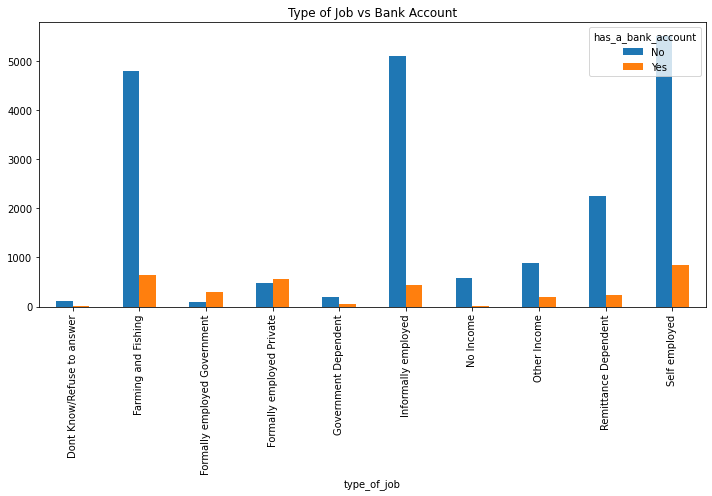

In [44]:
# How type of job relates to having a bank account
ax = df.groupby(['type_of_job', 'has_a_bank_account']).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 7))
ax.tick_params(axis='x', rotation=90)

plt.title('Type of Job vs Bank Account')

*Self employed persons had a higher number of people having bank accounts*

*But Formally/employed private had a higher percentage of having a bank account*

In [45]:
# Determine relationship between age and having a bank account with a z test
# H0: Respondent age does not influence if a respondent has a bank account or not
# H1: Respondent age influences if a respondent has a bank account or not
from statsmodels.stats.weightstats import ztest

sample = df[['respondent_age', 'has_a_bank_account']].sample(n=50, random_state=1)
zscore, p = ztest(x1 = sample[sample['has_a_bank_account']=='Yes']['respondent_age'].values, x2=sample[sample['has_a_bank_account']=='No']['respondent_age'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: 0.22769282189589132, p-value: 0.8198850531766764


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


P-value is greater than the significance level of 0.05. Therefore we accept the null hypothesis that has no influence on whether a respondent has a bank account or not



In [46]:
## Determine relationship between household size and having a bank account with a z test
# H0: Household size does not influence if a respondent has a bank account or not
# H1: Household size influences if a respondent has a bank account or not
sample = df[['household_size', 'has_a_bank_account']].sample(n=50, random_state=1)
zscore, p = ztest(x1 = sample[sample['has_a_bank_account']=='Yes']['household_size'].values, x2=sample[sample['has_a_bank_account']=='No']['household_size'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: -0.5763638234569741, p-value: 0.5643692915178041


P-value is less than the significance level of 0.05. Therefore we reject the null hypothesis and accept the alternate hypothesis that household size doe affect whether a respondent has a bank account or not



###**5.3 Multivariate Analysis**

####**5.3.1 Principal Component Analysis**

In [47]:
# Copy the dataframe
df_pca = df.copy()
df_pca.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [48]:
# Convert categorical variables into numbers
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df_pca['country'] = lb.fit_transform(df_pca['country'])
df_pca['type_of_location'] = lb.fit_transform(df_pca['type_of_location'])
df_pca['cellphone_access'] = lb.fit_transform(df_pca['cellphone_access'])
df_pca['gender_of_respondent'] = lb.fit_transform(df_pca['gender_of_respondent'])
df_pca['relationship_with_head'] = lb.fit_transform(df_pca['relationship_with_head'])
df_pca['level_of_education'] = lb.fit_transform(df_pca['level_of_education'])
df_pca['type_of_job'] = lb.fit_transform(df_pca['type_of_job'])
df_pca['marital_status'] = lb.fit_transform(df_pca['marital_status'])

df_pca.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,3,9
1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,5,9
3,0,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,2,3
4,0,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,2,5


In [49]:
# Drop unnecessary columns
df_pca.drop(['uniqueid'], axis=1,inplace=True)
df_pca.head()


,country,year,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,0,2018,Yes,0,1,3.0,24.0,0,5,2,3,9
1,0,2018,No,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,Yes,1,1,5.0,26.0,1,3,3,5,9
3,0,2018,No,0,1,5.0,34.0,0,1,2,2,3
4,0,2018,No,1,0,8.0,26.0,1,0,3,2,5


In [50]:
# Divide the dataset into a feature set and corresponding labels.
X = df_pca.drop('has_a_bank_account', 1)
y = df_pca['has_a_bank_account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [51]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(       country  year  type_of_location  cellphone_access  household_size  \
 4717         0  2018                 1                 1             5.0   
 2189         0  2018                 0                 0             1.0   
 16403        2  2017                 0                 1             1.0   
 5648         0  2018                 1                 1             3.0   
 6051         0  2018                 1                 1            12.0   
 ...        ...   ...               ...               ...             ...   
 13145        1  2016                 0                 0             1.0   
 19853        2  2017                 1                 0             3.0   
 9861         1  2016                 1                 1             8.0   
 10819        1  2016                 0                 1             7.0   
 2738         0  2018                 0                 1             7.0   
 
        respondent_age  gender_of_respondent  relationship_with_head  \
 4

In [52]:
# Perform normalisation of the feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)


[[-1.29194332  1.20155022  1.24419836 ... -0.39452149 -0.0041387
  -0.13941447]
 [-1.29194332  1.20155022 -0.80373036 ...  1.61433404 -1.66148932
  -1.43387309]
 [ 0.8640164   0.02464913 -0.80373036 ...  1.61433404 -0.0041387
   0.8314295 ]
 ...
 [-0.21396346 -1.15225196  1.24419836 ...  1.61433404 -0.0041387
   1.15504416]
 [-0.21396346 -1.15225196 -0.80373036 ... -0.39452149 -0.0041387
  -1.43387309]
 [-1.29194332  1.20155022 -0.80373036 ... -0.39452149 -0.0041387
  -0.13941447]]
[[ 1.94199627  1.20155022  1.24419836 ...  0.60990627  0.82453661
   0.18420019]
 [-1.29194332  1.20155022 -0.80373036 ... -0.39452149 -0.0041387
  -0.13941447]
 [ 0.8640164   0.02464913 -0.80373036 ... -2.40337702  0.82453661
   0.18420019]
 ...
 [ 0.8640164   0.02464913  1.24419836 ... -2.40337702  0.82453661
   1.15504416]
 [-1.29194332  1.20155022  1.24419836 ...  0.60990627 -0.0041387
  -0.13941447]
 [ 1.94199627  1.20155022 -0.80373036 ... -0.39452149 -0.0041387
   0.50781485]]


In [53]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train)
print(X_test)

[[-0.24884034 -1.40194562 -1.37754223 ... -0.51348888 -0.63244526
   0.09945054]
 [-0.48871054  3.95056727 -0.96376464 ...  0.44121886 -0.23120619
   0.32513305]
 [ 0.84344899  1.16307066 -0.47868627 ... -0.41981927  0.32566046
   0.118573  ]
 ...
 [ 0.33632908  1.39501889  0.61574622 ...  1.29881161  1.27485914
  -0.87258379]
 [-1.97146399 -0.20218749  2.21607378 ...  0.53205013 -0.18838355
   0.0366142 ]
 [-1.02531884 -0.9716464   1.7129497  ... -0.31671808 -0.29173145
  -0.44094611]]
[[ 1.81139905 -1.40345675  1.14420937 ...  0.66128908 -1.04004433
   1.23747855]
 [-1.04342004 -0.7784197   1.63444128 ... -0.13439369 -0.18429328
  -0.47429784]
 [ 0.95782406 -1.13695007  1.84339964 ...  0.02468121  0.55651024
   0.11928696]
 ...
 [ 1.91864554 -1.46317922  0.25394086 ... -0.38873502  1.7894626
   1.31813863]
 [ 0.14348167 -0.65323719 -1.38609795 ... -0.16126127 -0.51053806
   0.25687832]
 [ 1.98451364 -0.1226023   1.96410084 ...  0.19091061 -0.89141016
   0.25638249]]


In [54]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.1765309 , 0.15215584, 0.14119411, 0.10141283, 0.08908483,
       0.07682097, 0.06977597, 0.06020808, 0.05178956, 0.04226644,
       0.03876048])

In [55]:
# Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_test)
print(X_train)

[[ 1.81139905]
 [-1.04342004]
 [ 0.95782406]
 ...
 [ 1.91864554]
 [ 0.14348167]
 [ 1.98451364]]
[[-0.24884034]
 [-0.48871054]
 [ 0.84344899]
 ...
 [ 0.33632908]
 [-1.97146399]
 [-1.02531884]]


In [56]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [57]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, the random forest algorithm is able to correctly predict with an 
# accuracy of 85.97% .

[[4009    0]
 [ 647    0]]
Accuracy 0.8610395189003437


In [58]:
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [59]:
# Predicting the Test set results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4009    0]
 [ 647    0]]
Accuracy 0.8610395189003437


In [60]:
# finding results with the full feature set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [61]:
# predicting the results

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4009    0]
 [ 647    0]]
Accuracy 0.8610395189003437


*The Principal Component Analysis has an accuracy score of 86.1% which is quite good*

####**5.3.2 Linear Discriminant Analysis**

In [70]:
df_pca.head()

,country,year,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,0,2018,Yes,0,1,3.0,24.0,0,5,2,3,9
1,0,2018,No,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,Yes,1,1,5.0,26.0,1,3,3,5,9
3,0,2018,No,0,1,5.0,34.0,0,1,2,2,3
4,0,2018,No,1,0,8.0,26.0,1,0,3,2,5


In [62]:
# divide dataset into features and corresponding labels
x = df_pca.drop('has_a_bank_account', 1)
y = df_pca['has_a_bank_account']
print(x)
print(y)

       country  year  type_of_location  cellphone_access  household_size  \
0            0  2018                 0                 1             3.0   
1            0  2018                 0                 0             5.0   
2            0  2018                 1                 1             5.0   
3            0  2018                 0                 1             5.0   
4            0  2018                 1                 0             8.0   
...        ...   ...               ...               ...             ...   
23519        3  2018                 0                 1             4.0   
23520        3  2018                 0                 1             2.0   
23521        3  2018                 0                 1             5.0   
23522        3  2018                 1                 1             7.0   
23523        3  2018                 0                 1            10.0   

       respondent_age  gender_of_respondent  relationship_with_head  \
0               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [63]:
# The following code divides data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(       country  year  type_of_location  cellphone_access  household_size  \
 4717         0  2018                 1                 1             5.0   
 2189         0  2018                 0                 0             1.0   
 16403        2  2017                 0                 1             1.0   
 5648         0  2018                 1                 1             3.0   
 6051         0  2018                 1                 1            12.0   
 ...        ...   ...               ...               ...             ...   
 13145        1  2016                 0                 0             1.0   
 19853        2  2017                 1                 0             3.0   
 9861         1  2016                 1                 1             8.0   
 10819        1  2016                 0                 1             7.0   
 2738         0  2018                 0                 1             7.0   
 
        respondent_age  gender_of_respondent  relationship_with_head  \
 4

In [64]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [66]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [67]:
# Evaluating the Performance with the help of a confusion matrix and find the accuracy of the prediction.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3855  154]
 [ 433  214]]
Accuracy0.873926116838488


*The Linear Discriminant Analysis has an accuracy of 87.39% which is quite good*

##**6.0 Implementing the Solution**

In [82]:
# Change bank account from categorical to numbers
df_has_bank = df_pca.copy()
df_has_bank['has_a_bank_account'] = lb.fit_transform(df_has_bank['has_a_bank_account'])


In [83]:
df_has_bank.head()

,country,year,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,0,2018,1,0,1,3.0,24.0,0,5,2,3,9
1,0,2018,0,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,1,1,1,5.0,26.0,1,3,3,5,9
3,0,2018,0,0,1,5.0,34.0,0,1,2,2,3
4,0,2018,0,1,0,8.0,26.0,1,0,3,2,5


Text(0.5, 1.0, 'Correlation between All Features')

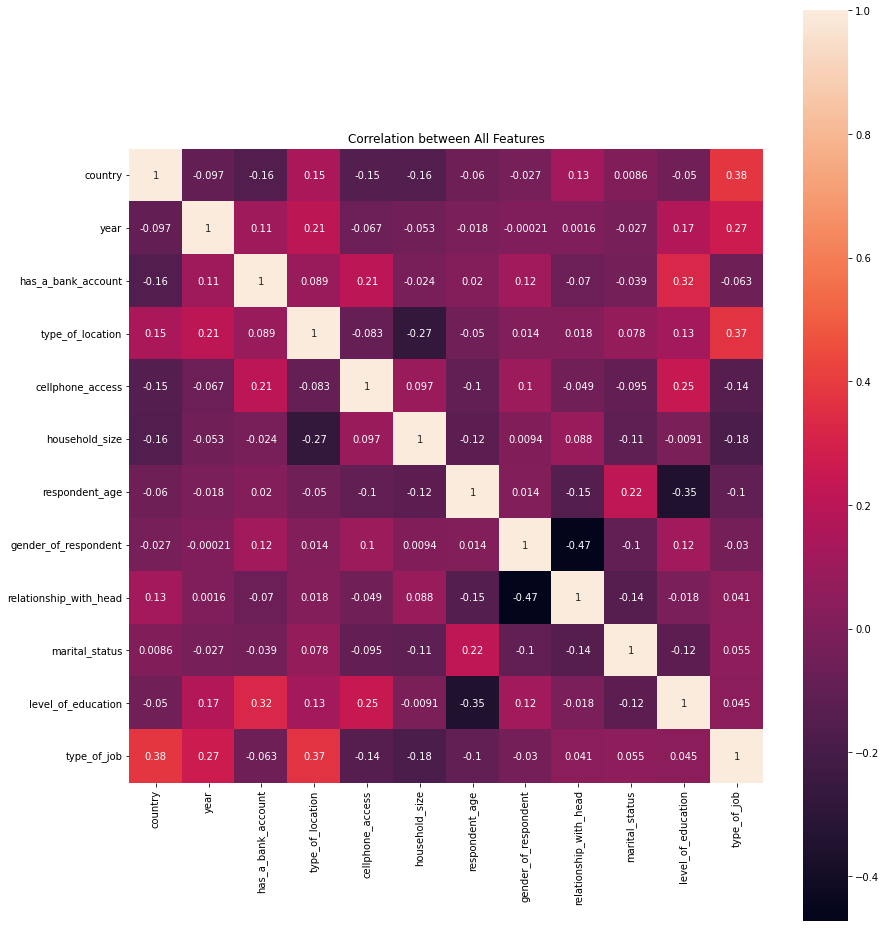

In [87]:
# Check correlation of all columns
plt.figure(figsize=(13,13))

sns.heatmap(df_has_bank.corr(), square=True,annot=True)

plt.title('Correlation between All Features')

*From this heatmap we can see that having a bank account has a low positive correlation to the columns type of gender,age,type of location,year*

*From this heatmap we can see that having a bank account has a low negative correlation to the columns type of type of job, marital status, relationship with head, household size, country*

*Although still low positive correlation, but the columns level of education correlate with 0.32 and cellphone access with 0.21*

##**7.0 Challenging the solution**

I'd challenge the solution by removing outliers just to see if the outcome would be different.
Also get more data to try and improve the accuracy score for the LDA and PCA 

##**9.0 Follow up questions**

###9.1 Did we have the right data?

I think we had the right data that answered our question very well, with different demographics and variability

###9.2 Do we need other data to answer our question?

Our question has already been answered but for a better prediction we can get more data from other years

###9.3 Did we have the right question?

We did have the right question as our data has provided us with our metric of success which was

* To identify the characteristics and categories of individuals who are most likely to have or use a bank account
* Show the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda
* Providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.